<a href="https://colab.research.google.com/github/ArceLopera/ComputerVisionPython/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Image Processing in Python

## Load Dependencies


In [2]:
import numpy as np # for linear algebra, Fourier transform, and random number capabilities
import pandas as pd # for data analysis
import cv2 as cv # for computer vision applications
from google.colab.patches import cv2_imshow # for image display
from skimage import io # for image processing applications
from PIL import Image # provides general image handeling and lots of useful basic image operations
from matplotlib.pylab import * # python plotting lib, providing object-oriented API for embedding plots

In [6]:
cv.__version__

'4.6.0'

## Read Image from Urls

In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

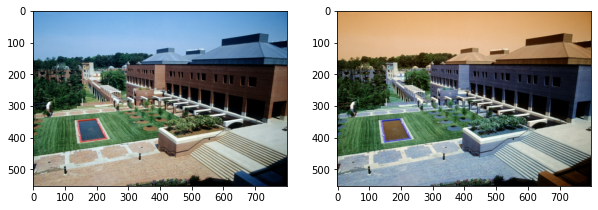

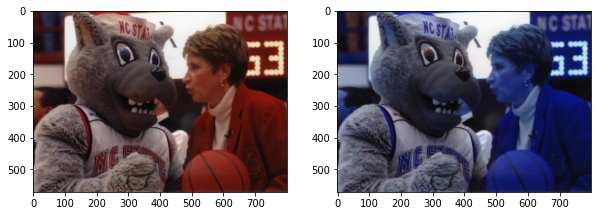

In [3]:
# Create a list to store the strings of the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg"]
        
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  plt.figure(figsize=([10, 10]))
  plt.subplot(121), plt.imshow(image)
  plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

Image source examples:
1. [Unsplash](https://unsplash.com/)Unsplash provides free (do whatever you want) high-resolution photos.

2. [Lorem Picsum](https://picsum.photos/) provides an easy way for web developers to get elegant placeholder images. API access is available through simple and intuitive urls like picsum.photos/200/300 for a random 200px x 300px image.

  + Basic Usage - Just put your image size (width & height) after our URL and you'll get a placeholder.
https://picsum.photos/200/300
  + To get a square image, just put the size you want.
https://picsum.photos/200
  + Grayscale - Use the /g/ path to greyscale the image.
https://picsum.photos/g/200/300
  + List images - Get a list of images by using the /list endpoint.
https://picsum.photos/list

3. [Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.


4. [Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

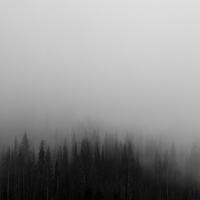

In [4]:
url = "https://placekitten.com/500/380"
url = "https://picsum.photos/200"
myImg = io.imread(url)  
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))

## Histograms

In [8]:
type(image)

numpy.ndarray

In [13]:
image.size #tatal pixels in image

1370400

In [9]:
len(image)

571

In [10]:
len(image[0])

800

In [11]:
len(image[0][0])

3

In [7]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the image dimension
image.shape

uint8


(571, 800, 3)

In [8]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


In [12]:
image[50,100]#get the value from the x y coordinates

array([206, 177, 145], dtype=uint8)

Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

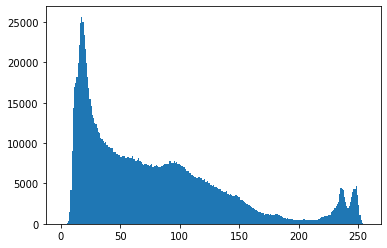

In [8]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

Display the histogram of R, G, B channel We could observe that the green channel has many pixels in 255, which represents the white patch in the image

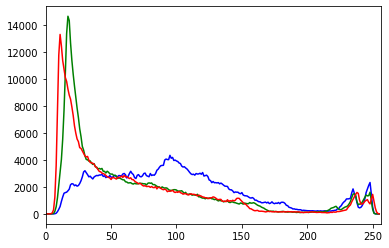

In [9]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

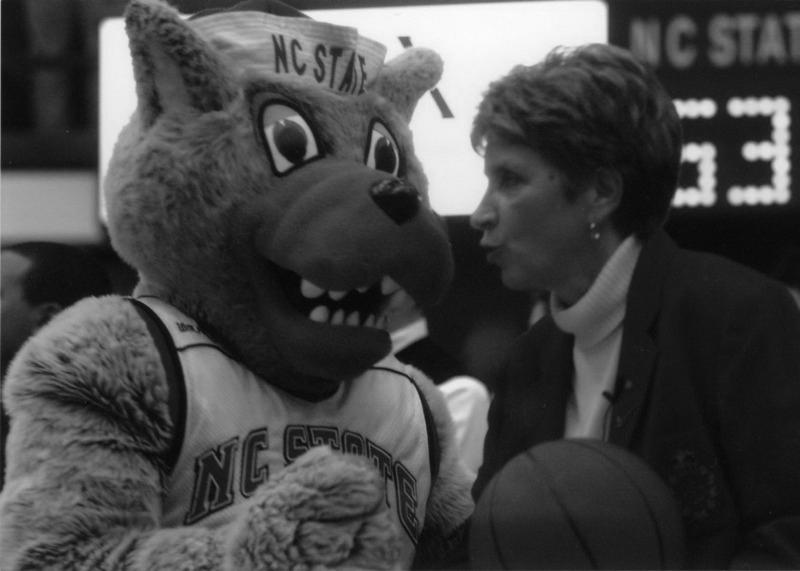

In [4]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

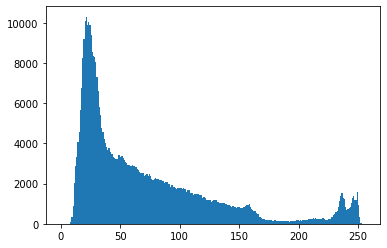

In [11]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

## Image Contours

#### Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

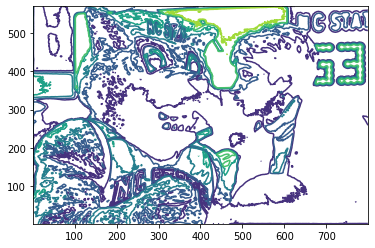

In [12]:
plt.contour(gray_image, origin = "image")

#### Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/4.6.0/d4/d73/tutorial_py_contours_begin.html)

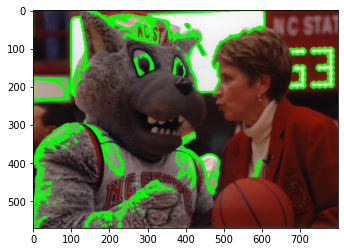

In [15]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,127,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

## Grayscale Transform

his section provides some examples of conducting mathematical transformations of the grayscale image

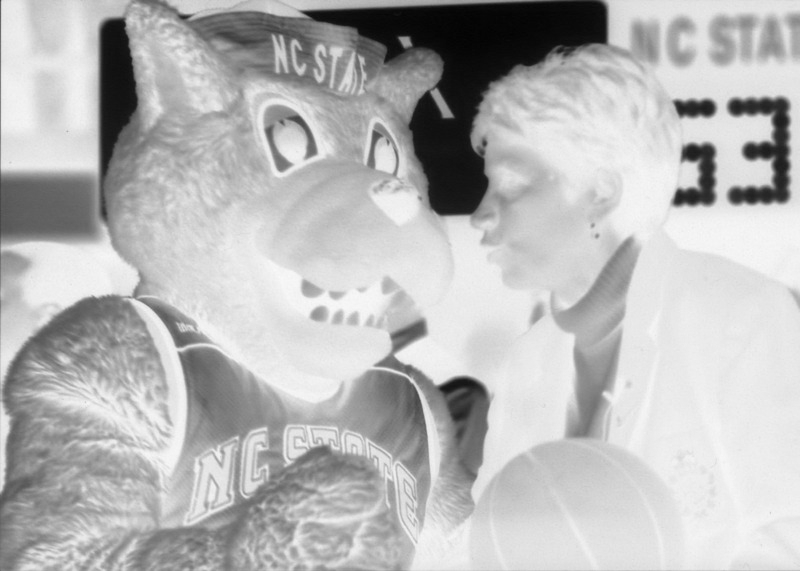

In [16]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

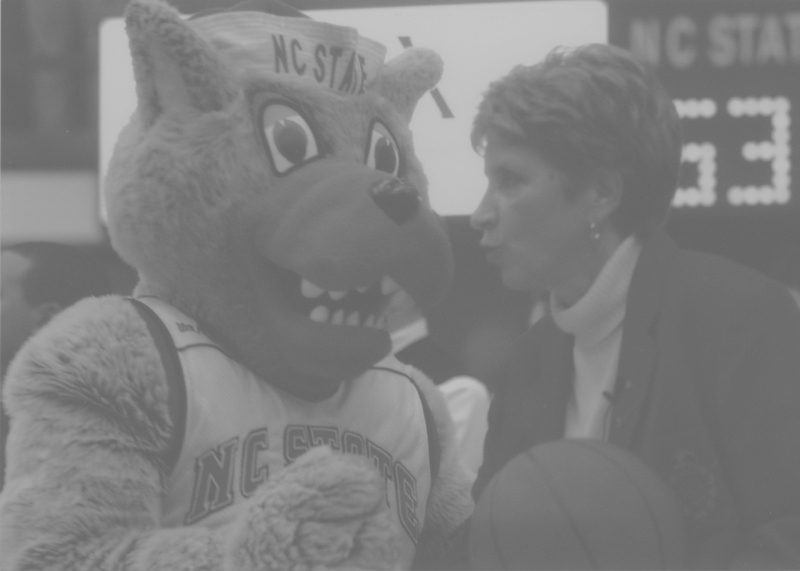

In [17]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

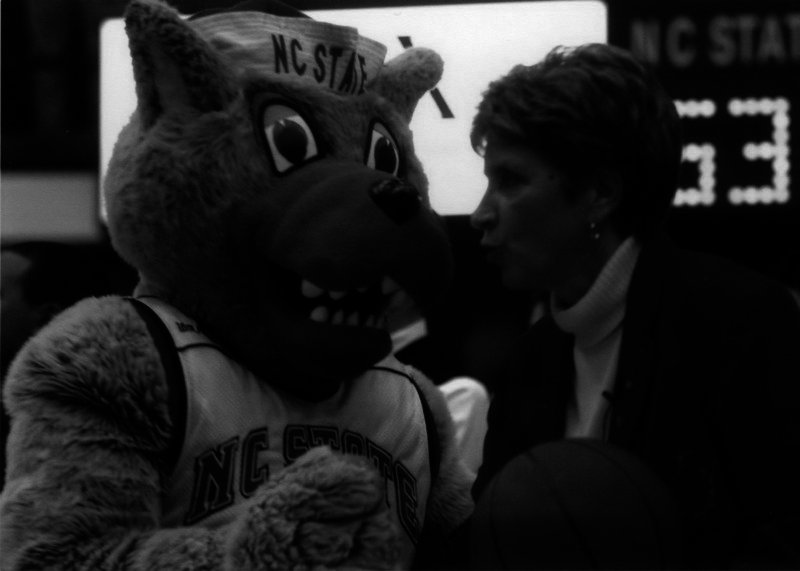

In [18]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

## Histogram Equalization

This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

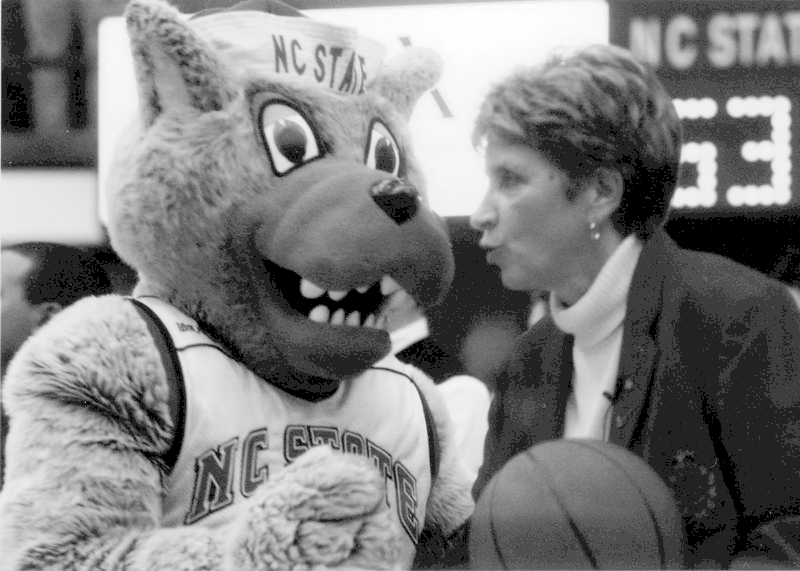

In [19]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

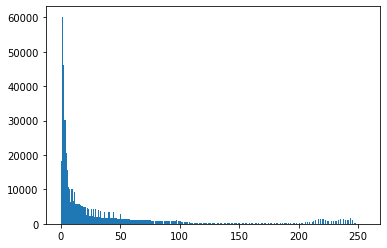

In [20]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

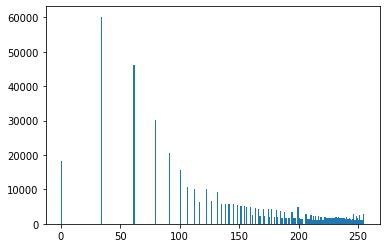

In [21]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

## Fourier Transform of Gray Images

A fourier transform is used to find the frequency domian of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

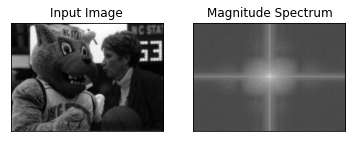

In [5]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Finding Edges by Highpass Filtering in FFT

This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

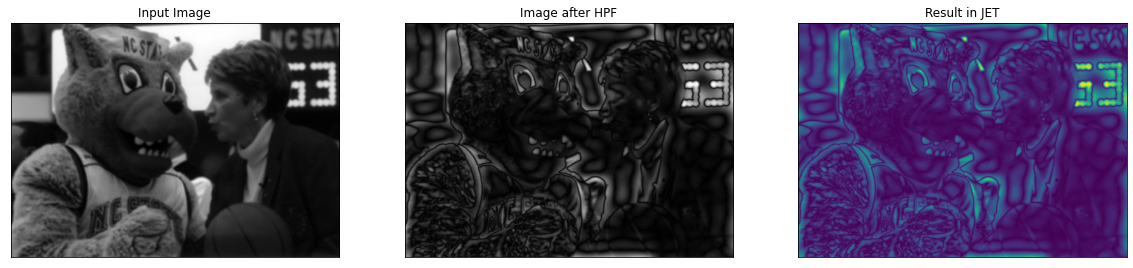

In [6]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()